Abre os dados

In [7]:
from Utils import abre_arquivo
from sklearn.model_selection import train_test_split


file_path = '/home/gpsp95/Área de Trabalho/projetos programação/Inteligencia_Artificial/iris.data'

dados_totais = abre_arquivo(file_path)

dados = [amostra for amostra in dados_totais if amostra[4] != 'Iris-versicolor']

dados_virginica = [[x[0], x[1], x[4]] for x in dados if x[4] =='Iris-virginica']
dados_setosa = [[x[0], x[1], x[4]] for x in dados if x[4] =='Iris-setosa']

                

Plota graficos dos dados

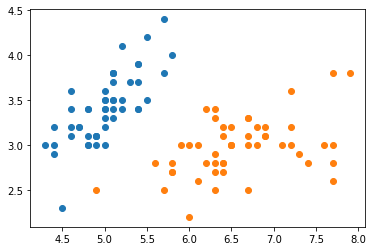

In [8]:
import matplotlib.pyplot as plt

plt.scatter([x[0] for x in dados_setosa], [x[1] for x in dados_setosa])
plt.scatter([x[0] for x in dados_virginica], [x[1] for x in dados_virginica])

plt.show()


Separa os dados

In [9]:
import random as rand
import numpy as np

# Setosa

X_setosa_treino = dados_setosa[:int(len(dados_setosa)*0.8)]
X_setosa_teste = dados_setosa[int(len(dados_setosa)*0.8):]

# Virginica

X_virginica_treino = dados_virginica[:int(len(dados_virginica)*0.8)]
X_virginica_teste  = dados_virginica[int(len(dados_virginica)*0.8):]

# Dados Treino

dados_treino = X_setosa_treino + X_virginica_treino
rand.shuffle(dados_treino)
dados_treino

X_treino = np.array([[x[0], x[1]] for x in dados_treino])
Y_treino = []
for x in dados_treino:
  if x[2] == 'Iris-setosa':
    Y_treino.append(-1)

  else:
    Y_treino.append(1)

# Dados Teste

dados_teste = X_setosa_teste + X_virginica_teste
rand.shuffle(dados_teste)
dados_teste

X_teste = np.array([[x[0], x[1]] for x in dados_teste])
Y_teste = []
for x in dados_teste:
  if x[2] == 'Iris-setosa':
    Y_teste.append(-1)

  else:
    Y_teste.append(1)

Y_treino = np.array(Y_treino)
Y_teste = np.array(Y_teste)

Treina Modelo

In [10]:
from Classificador_Linear import Perceptron

modelo = Perceptron(eta= 0.8)


modelo.fit(X_treino, Y_treino)

In [11]:
modelo.b, modelo.W, modelo.n_tentativas

(array([4.63774619]), array([ 4.24364244, -8.62566263]), 2)

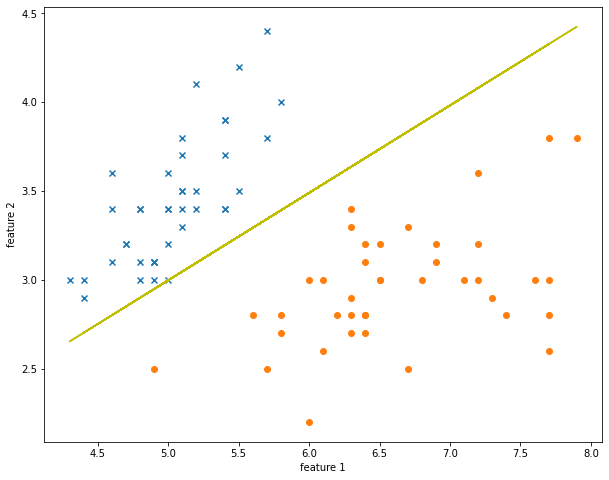

In [12]:
from Utils import plot_reta

plot_reta(X_treino, Y_treino, modelo.W, modelo.b)